In [2]:
#Import Python Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from pytz import common_timezones, all_timezones, timezone

In [3]:
#activity_file = "D:/downloads/activity_873783146.tcx" # Naul cycle with Barry
#activity_file = "D:/downloads/activity_898238015.tcx" # Great Dublin Cycle

# Define name and path of data file
# This data file contains a sub-set of activiy information relating to speed and time

input_file = 'activity_898238015.json' # Great Dublin Cycle
input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file_path = os.path.join(input_dir , input_file)

print ("Input file is (full path)  ", input_file_path)



Input file is (full path)   /opt/jupyter/data/csv/activity_898238015.json


In [4]:
with open(input_file_path) as file_obj:
    i = 0
    for lines in file_obj:
        print(lines[:650])

{"data_points": [{"cadence": 76, "latitude": 53.36370773613453, "distance": 5.010000228881836, "heart_rate": 103, "time": "2015-09-13T06:25:51", "longitude": -6.190182846039534, "altitude": 79.4000015258789}, {"cadence": 83, "latitude": 53.363760793581605, "distance": 28.09000015258789, "heart_rate": 106, "time": "2015-09-13T06:25:56", "longitude": -6.190518541261554, "altitude": 90.80000305175781}, {"cadence": 84, "latitude": 53.36377898231149, "distance": 34.7400016784668, "heart_rate": 106, "time": "2015-09-13T06:25:57", "longitude": -6.1906137596815825, "altitude": 90.80000305175781}, {"cadence": 85, "latitude": 53.363817036151886, "dista


In [5]:
with open(input_file_path, 'r') as json_data:
    d = json.load(json_data)

In [6]:
df = pd.DataFrame.from_dict(d['data_points'])

In [28]:
# convert time field to Python datetime type
#df.time = pd.to_datetime(df.time)

In [37]:
# for cadence - if missing set to -1 so that we can investigate later
# convert this column to integer
#df.cadence = df.cadence.fillna(-1).astype('int')

In [8]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
0,79.400002,76,5.010000,103,53.363708,-6.190183,2015-09-13T06:25:51
1,90.800003,83,28.090000,106,53.363761,-6.190519,2015-09-13T06:25:56
2,90.800003,84,34.740002,106,53.363779,-6.190614,2015-09-13T06:25:57
3,90.800003,85,40.650002,108,53.363817,-6.190668,2015-09-13T06:26:00
4,90.800003,87,52.090000,110,53.363877,-6.190771,2015-09-13T06:26:03


In [9]:
#check the data type conversions are good:
df.dtypes

altitude      float64
cadence       float64
distance      float64
heart_rate      int64
latitude      float64
longitude     float64
time           object
dtype: object

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


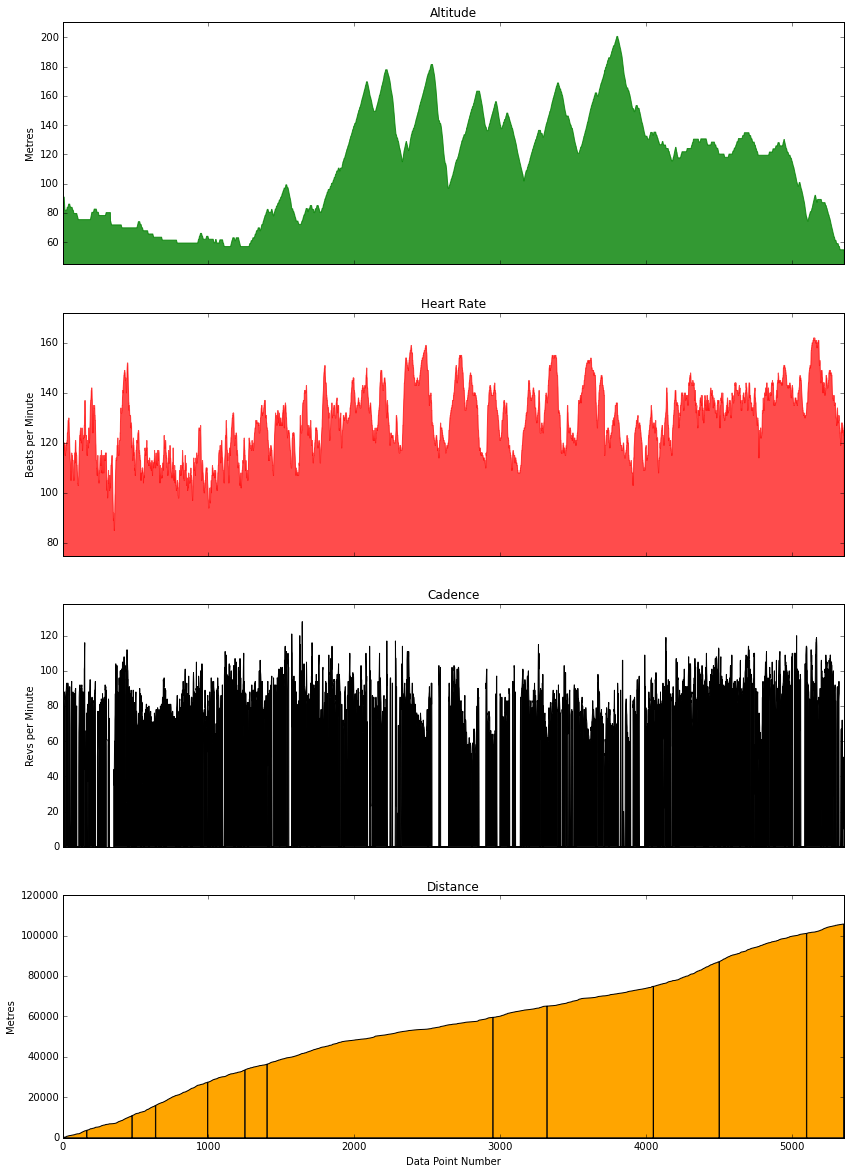

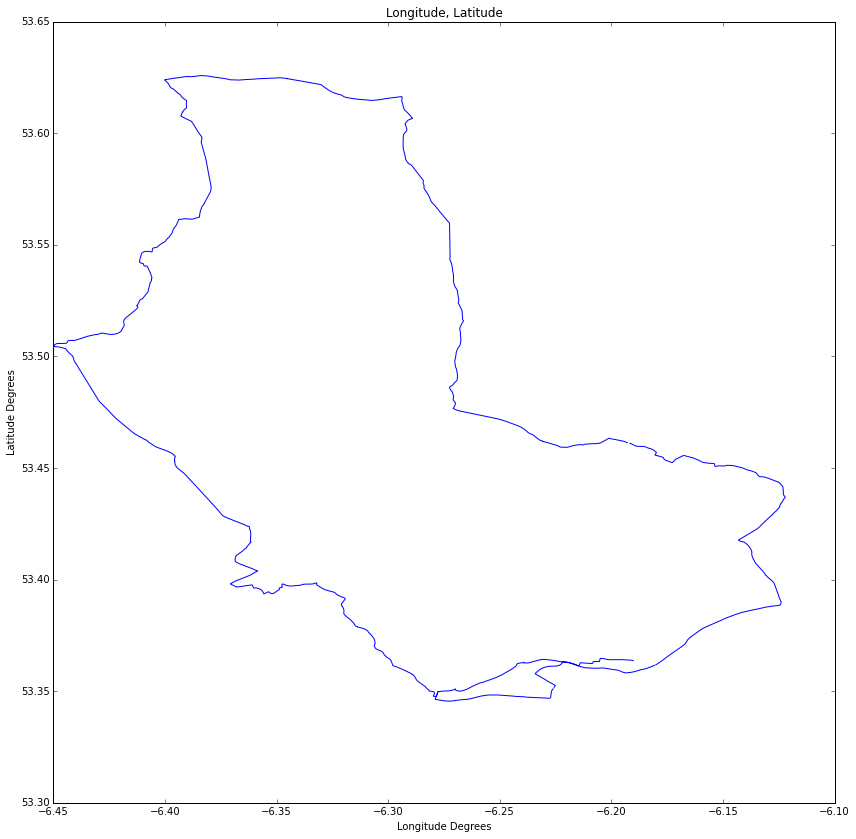

In [10]:
# new style method 2; use an axes array
fig, axs = plt.subplots(4, 1, sharex=True,  figsize=(14, 20))

axs[0].fill_between(range(len(df)),df.altitude,  
                    facecolor='green', 
                    alpha=0.8,
                   color = 'green')
axs[0].set_ylabel('Metres')
axs[0].set_title('Altitude')
axs[0].set_ylim( [min(df.altitude) - 10, max(df.altitude) + 10])

axs[1].fill_between(range(len(df)),df.heart_rate,  
                    facecolor='red', 
                    alpha=0.7,
                   color = 'red')
axs[1].set_ylabel('Beats per Minute')
axs[1].set_title('Heart Rate')
axs[1].set_ylim( [min(df.heart_rate) - 10, max(df.heart_rate) + 10])

axs[2].fill_between(range(len(df)),df.cadence,  
                    facecolor='black',)
axs[2].set_ylabel('Revs per Minute')
axs[2].set_title('Cadence')
axs[2].set_ylim( [0, max(df.cadence) + 10])

axs[3].fill_between(range(len(df)),df.distance,  facecolor='orange',)
axs[3].set_ylabel('Metres')
axs[3].set_title('Distance')
axs[3].set_xlim( [0, len(df)])
axs[3].set_xlabel('Data Point Number')



fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

In [11]:
df.describe()

,altitude,cadence,distance,heart_rate,latitude,longitude
count,5358.000000,5312.000000,5347.000000,5358.000000,5347.000000,5347.000000
mean,111.955730,65.521273,55305.131840,128.561590,53.491536,-6.301922
std,36.721701,34.935758,28127.615377,13.721647,0.093893,0.083439
min,54.799999,0.000000,5.010000,85.000000,53.345526,-6.449606
25%,78.000000,57.000000,35449.244141,118.000000,53.397380,-6.381119
50%,119.400002,78.000000,56192.808594,129.000000,53.495561,-6.293268
75%,137.800003,89.000000,74205.464844,139.000000,53.577163,-6.258500
max,200.600006,128.000000,105730.960938,162.000000,53.625859,-6.122161


In [14]:
number_data_points = len(df)
print("Number of data points is {:,}".format(number_data_points))

Number of data points is 5,358


### Check altitude data for missing values

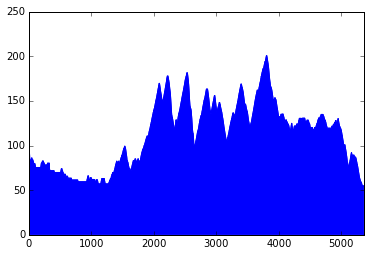

In [21]:
_ = df.altitude.plot(kind = 'area')

In [19]:
print("Number of missing altitude data points is {:,}"\
.format( number_data_points - df.altitude.count() ) )

Number of missing altitude data points is 0


In [20]:
df[ df.altitude.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time


Altitude data looks good - no missing data

### Check altitude data for missing values

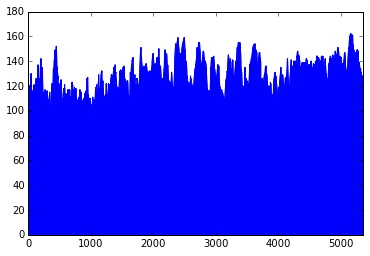

In [28]:
_ = df.heart_rate.plot(kind = 'area')

In [29]:
print("Number of missing heartrate data points is {:,}"\
.format( number_data_points - df.heart_rate.count() ) )

Number of missing heartrate data points is 0


In [30]:
df[ df.heart_rate.isnull() == True ]

,altitude,cadence,distance,heart_rate,latitude,longitude,time


Heart Rate data looks good - no missing data

### Check cadence  for missing values

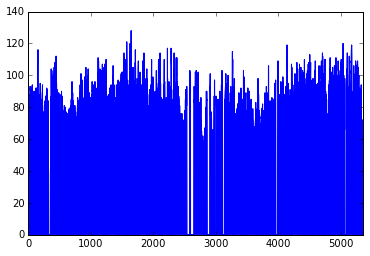

In [22]:
_ = df.cadence.plot(kind = 'area')

In [24]:
print("Number of missing cadence data points is {:,}"\
.format( number_data_points - df.cadence.count() ) )

Number of missing cadence data points is 46


In [63]:
df[ df.cadence.isnull() == True ].head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time
109,75.400002,NaN,1977.489990,103,53.361328,-6.214706,2015-09-13T06:31:08
110,75.400002,NaN,1983.209961,106,53.361323,-6.214791,2015-09-13T06:31:10
238,80.400002,NaN,5270.680176,107,53.354209,-6.256836,2015-09-13T06:39:29
301,80.199997,NaN,6618.569824,111,53.350090,-6.273613,2015-09-13T06:43:35
302,80.199997,NaN,6628.750000,109,53.350090,-6.273765,2015-09-13T06:43:37


In [38]:
# if cadence is missing then set to -1
# this means we account for all cadence values, and can identify missing values later
df.cadence.fillna(method='ffill', inplace = True)

In [27]:
print('Cadence data type is {}'.format(df.cadence.dtype) )
print('Setting data type is int')
df.cadence = df.cadence.astype('int')
print('Cadence data type is {}'.format(df.cadence.dtype) )

Cadence data type is float64
Setting data type is int
Cadence data type is int64


### Check distance for missing values

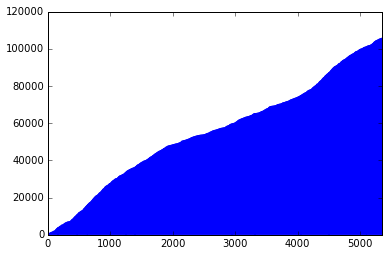

In [31]:
_ = df.distance.plot(kind = 'area')

In [32]:
print("Number of missing distance data points is {:,}"\
.format( number_data_points - df.distance.count() ) )

Number of missing cadence data points is 11


In [36]:
df.distance.fillna(method='ffill', inplace = True) # last know value method

print("Number of missing distance data points is {:,}"\
.format( number_data_points - df.distance.count() ) )

### Check latitude,longitude for missing values

In [39]:
print("Number of missing longitude data points is {:,}"\
.format( number_data_points - df.longitude.count() ) )
print("Number of missing latitude data points is {:,}"\
.format( number_data_points - df.latitude.count() ) )

Number of missing longitude data points is 11
Number of missing latitude data points is 11


In [40]:
df.longitude.fillna(method='ffill', inplace = True) # last know value method
df.latitude.fillna(method='ffill', inplace = True) # last know value method

In [41]:
print("Number of missing longitude data points is {:,}"\
.format( number_data_points - df.longitude.count() ) )
print("Number of missing latitude data points is {:,}"\
.format( number_data_points - df.latitude.count() ) )

Number of missing longitude data points is 0
Number of missing latitude data points is 0
